# ***Tarea 1***
Materia: Proyecto II

Profesora: María Fernanda Sánchez Puig

Ayudante: Sergio Miguel Fernández Martínez

Alumna: Vega Rebollo Itzel Abigail

# AJUSTE DE REGRESIÓN LINEAL MÚLTIPLE
Un modelo lineal es propuesto cuando se quiere demostrar si existe una relación lineal entre una variable respuesta $Y$ y una variable $X$ o conjunto de variables explicativas $X_i$. Para cualquier modelo lineal, la variable respuesta es del tipo continua y las variables explicativas pueden ser continuas o categóricas.

La mayoría de los fenómenos reales son multicausales, por esta razón, un modelo de regresión más acorde a estudios reales es el modelo de regresión lineal múltiple, que es la generalización del modelo simple. En este caso supondremos que la variable respuesta $Y$ puede explicarse a trav\'es de un conjunto de $k$ covariables $X_1, . . . , X_k.$
El modelo de regresi\'on lineal m\'ultiple se escribe como:
$$ Y_i = \beta_0 + \beta_1X_{1i} + \beta_2 X_{2i} + ... + \beta_k X_{ki} + \varepsilon _i \quad \text{para} \quad i=1,...,n$$

Donde: 
$Y_i$ es la variable respuesta

$Xij$ es el valor observado de la covariable $j$

$\varepsilon_i$ es el  error.


La representación de forma matricial de este modelo es la siguiente: \\
$$Y = X\beta + \varepsilon $$
las cuales son matrices de dimensión: \\
$Y_{n \times 1} \quad X_{n \times p} \quad \beta_{p \times 1} \quad \text{y} \quad \varepsilon_{n \times 1 }$\\


In [103]:
#"Importamos los paquetes que utilizaremos"
import torch
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns 
from torch import nn
from torch import optim
from progressbar import ProgressBar
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 

matplotlib.style.use('ggplot')

In [127]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("data_calories.csv")
data.head()

Saving data_calories.csv to data_calories (4).csv


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190,94,29,105,40.8,231
1,20,166,60,14,94,40.3,66
2,69,179,79,5,88,38.7,26
3,34,179,71,13,100,40.5,71
4,27,154,58,10,81,39.8,35


In [105]:
#Para evitar contenido nulo
pd.DataFrame(data.isnull().sum(), columns=["Contenido nulo"])
#tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         15000 non-null  int64  
 1   Height      15000 non-null  int64  
 2   Weight      15000 non-null  int64  
 3   Duration    15000 non-null  int64  
 4   Heart_Rate  15000 non-null  int64  
 5   Body_Temp   15000 non-null  float64
 6   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 820.4 KB


# Descripción de las variables: 

Edad: Esta variable tiene como datos las edades de las personas, la cual está  medida en años.

Peso: El peso del cuerpo humano se refiere a la masa o el peso de una persona. El peso corporal se mide
en kilogramos, por lo tanto esa es la medida con la que se trabajará.

Duración : Esta variable nos dice el tiempo en que la persona estuvo realizando actividad física, será
medida en minutos.

Ritmo cardíaco: Se define la frecuencia cardiaca como las veces que el corazón realiza el ciclo completo de llenado y vaciado de sus cámaras en un determinado tiempo. El ritmo cardiaco registrado se tomó al finalizar el ejercicio. La medida de esta variable es en latidos por minuto.

Temperatura corporal: La temperatura corporal es el grado de calor del cuerpo. Los seres humanos
contamos con mecanismos que nos permiten mantener nuestra temperatura dentro de límites estrechos
a pesar de que existan grandes fluctuaciones de la misma en el entorno.La medida de esta variable será en grados celsius.

Calorías quemadas: Contará las calorías que han sido gastadas en la ejecucóon de la actividad física
realizada.

# Histogramas

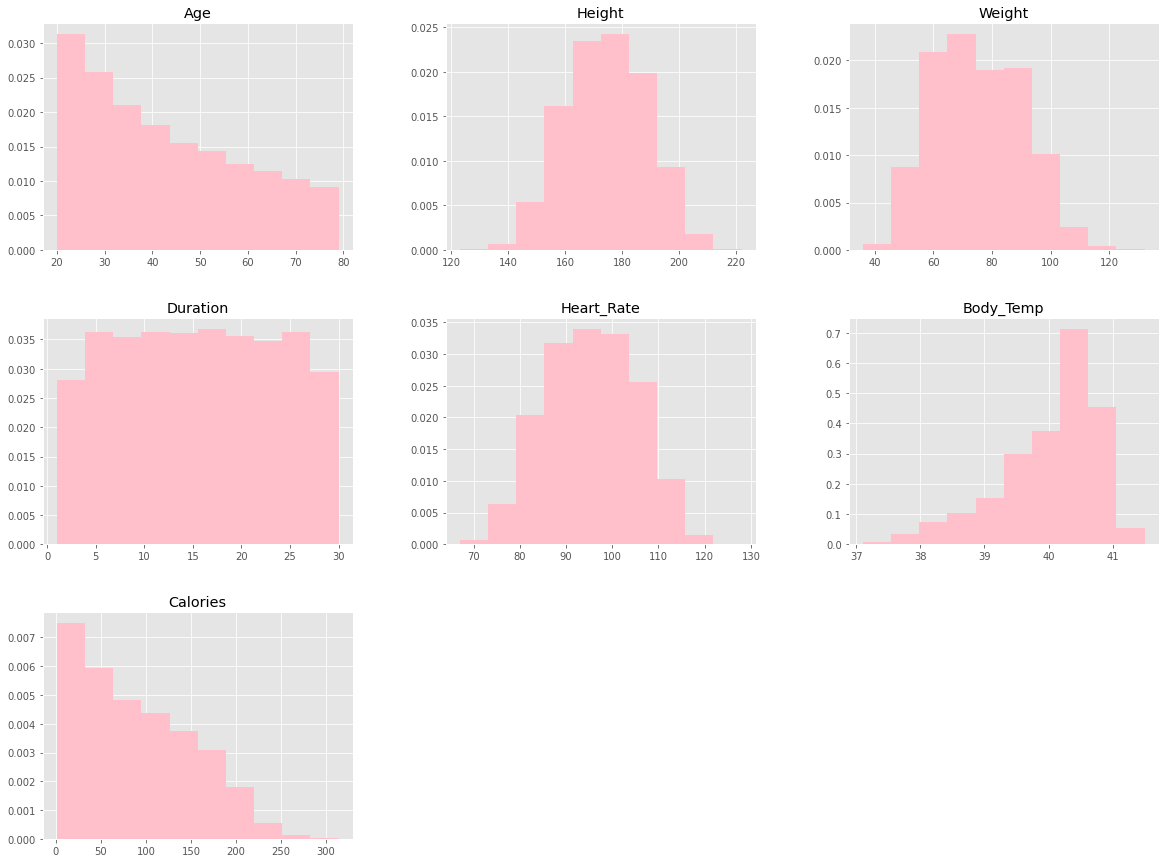

In [106]:
%matplotlib inline
data.hist(figsize=[20,15], bins=10, density = True, color="pink")
plt.show()

# Relación entre variables

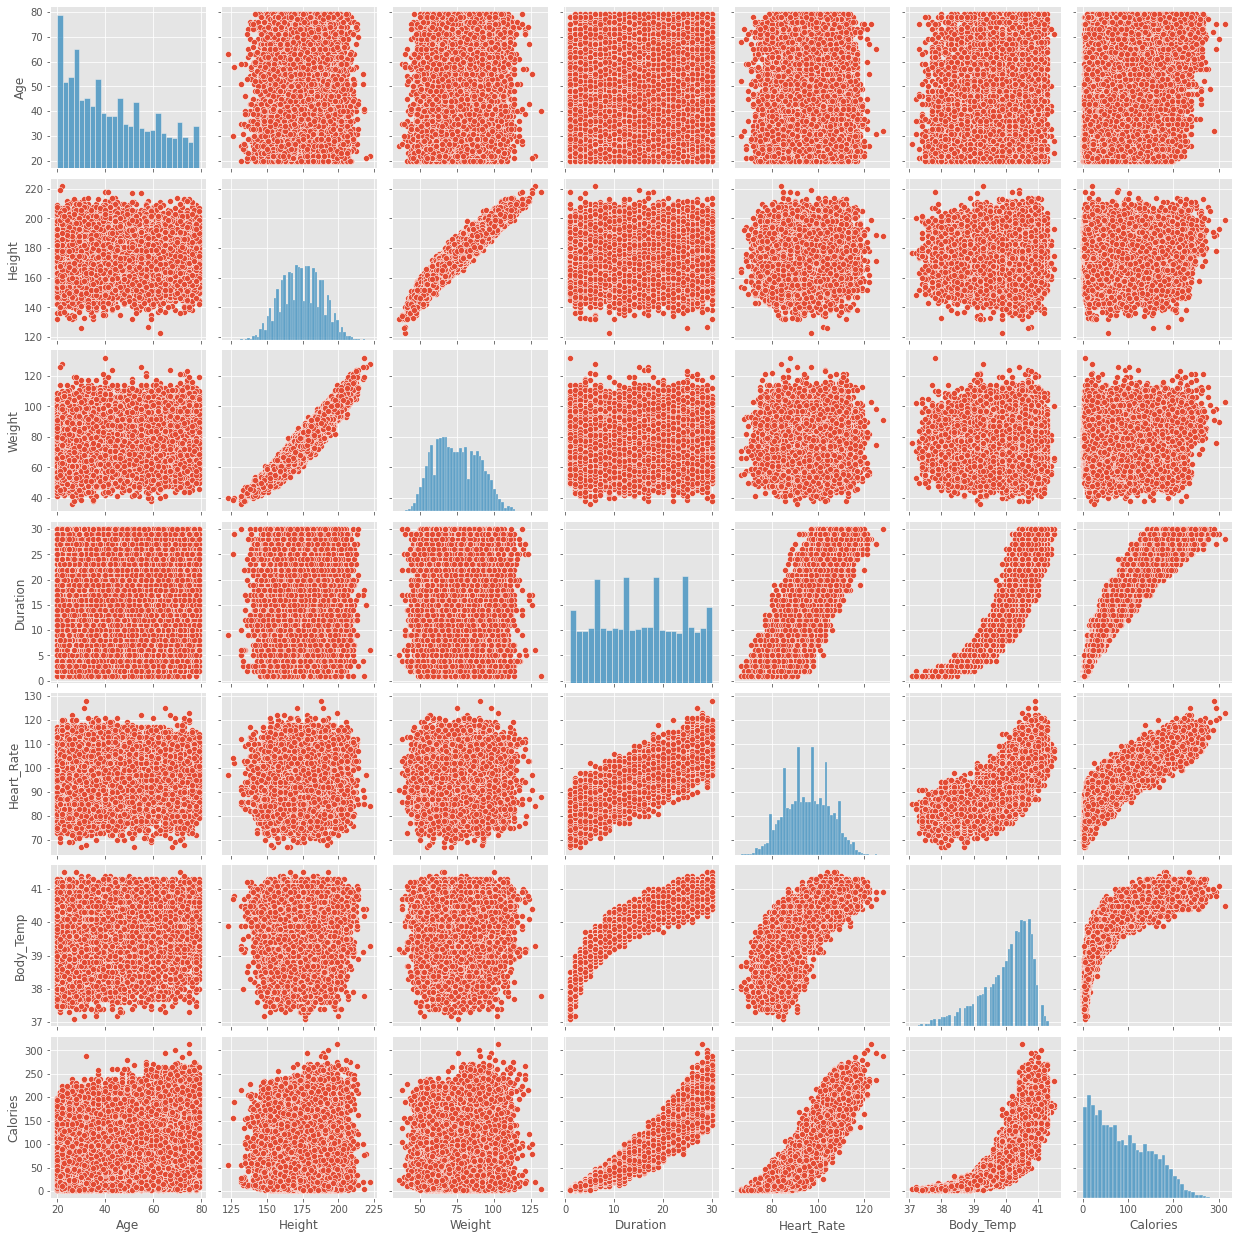

In [33]:
g=sns.pairplot(data)

# Datos de entrenamiento


In [128]:
X= data.drop('Calories', 1)
y=data['Calories'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler=sklearn.preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [129]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

TypeError: ignored

In [130]:
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

TypeError: ignored

In [131]:
train_set = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

TypeError: ignored

In [132]:
class DataFrameDataset(Dataset):
  def __init__(self, data, x_names:list, y_name):
    X = data[x_names] #En nuestro caso serán 6 variables
    Y = data[y_name] # la columna de la variable Calories
    self.X = torch.from_numpy(X.to_numpy()).to(dtype=torch.float32)
    self.Y = torch.from_numpy(Y.to_numpy()).to(dtype=torch.float32)

  def __len__(self):
    return self.Y.size()[0]

  def __getitem__(self, idx):
    x = self.X[idx, :]
    y = self.Y[idx]
    return x, y


# Definición DataSet 
para regresión multivariable.

In [133]:
x_names = ['Age','Height', 'Weight','Duration', 'Heart_Rate','Body_Temp']
train_set = DataFrameDataset(training_data, x_names, 'Calories')
test_dataset = DataFrameDataset(test_data, x_names, 'Calories')

In [134]:
dataset = DataFrameDataset(training_data,x_names, 'Calories')

dataset.__getitem__(0)

(tensor([ 20.0000, 166.0000,  60.0000,  14.0000,  94.0000,  40.3000]),
 tensor(66.))

Dividimos `test_dataset` en `test_set` y `val_set`.

In [135]:
msk = np.random.rand(len(test_dataset)) < 0.6
val_set = torch.utils.data.Subset(test_dataset, np.where(msk)[0])
test_set = torch.utils.data.Subset(test_dataset, np.where(~msk)[0])
n_test = len(test_set)

In [136]:
batch_size = 1
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=n_test)

MODELO LINEAL

In [137]:
class LinearNet(nn.Module):
  def __init__(self,n_in, n_out):
    super(LinearNet, self).__init__()
    self.layer = nn.Linear(in_features=n_in, out_features=n_out, bias=True)
    self.in_features = n_in

  def forward(self, x):
    out = self.layer(x)
    return out

model = LinearNet(6, 1) #Definimos el modelo que describe a nuestros datos con el número de variables que tenemos 

FUNCIÓN OBJETIVO Y OPTIMIZADOR

In [138]:
cost = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.0, nesterov=False)

# ENTRENAMIENTO 
(visto en ejemplos subidos)

In [139]:
def update_parameters(model, dataloader, optimizer, criterion, train=True):
  running_loss = 0.0
  for i, data in enumerate(dataloader, 0):
    X, Y = data
    n = len(X)
    X = X.reshape((n, model.in_features)) 
    m = len(Y)
    Y = Y.reshape((m, 1)) 
    if train:
      optimizer.zero_grad() # reinicia el gradiente
    pred = model(X) # forward pass 
    loss = criterion(pred, Y) # evaluación de predicción
    if train:
      loss.backward() # calcula las derivadas 
      optimizer.step() # paso de optimización 

    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
  return avg_loss

# Entrenamiento del modelo

In [ ]:
epoch_loss = list()
val_loss = list()
epochs = 100

for epoch in range(epochs):
  loss_train = update_parameters(model, train_dataloader, optimizer, cost)
  loss_val = update_parameters(model, val_dataloader, None, cost, train=False)
  epoch_loss.append(loss_train)
  val_loss.append(loss_val)
  if epoch % 5 == 0:
    print('epoch {}, train loss {}, val loss {}'.format(epoch, loss_train, loss_val))

epoch 0, train loss nan, val loss nan
epoch 5, train loss nan, val loss nan
epoch 10, train loss nan, val loss nan


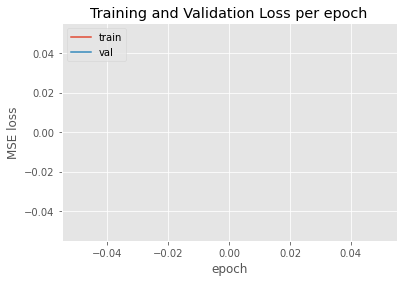

In [117]:
plt.plot(epoch_loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss per epoch')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prueba del modelo

In [141]:
data = next(iter(test_dataloader))
X, Y = data
n = len(Y)
Y = Y.reshape((n, 1)) # -> Corrección de tamaño
pred = model(X)
error = cost(Y, pred)
print('error de prueba :{}'.format(error.item()))

error de prueba :nan
